In [95]:
%matplotlib inline

In [125]:
import numpy as np
import pandas as pd

#Libraries for visualisation
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

#Libraries for formattting text 
import re

#Library for spacy
import spacy

#Library for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data Loading and EDA

In [97]:
train = pd.read_csv('train.csv')

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [99]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [100]:
test = pd.read_csv('test.csv')

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [102]:
test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [107]:
train_target_value_counts = train.target.value_counts()
train_target_value_counts

target
0    4342
1    3271
Name: count, dtype: int64

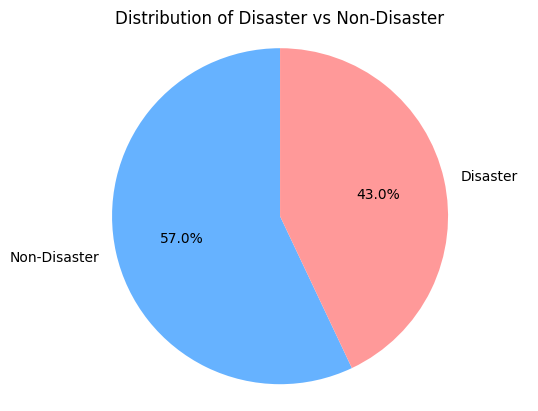

In [108]:
# Extracting data from the simulated value counts
labels = ['Non-Disaster', 'Disaster']
sizes = [train_target_value_counts[0], train_target_value_counts[1]]

# Create pie chart using the extracted data
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b2ff', '#ff9999'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display
plt.title('Distribution of Disaster vs Non-Disaster')
plt.show()

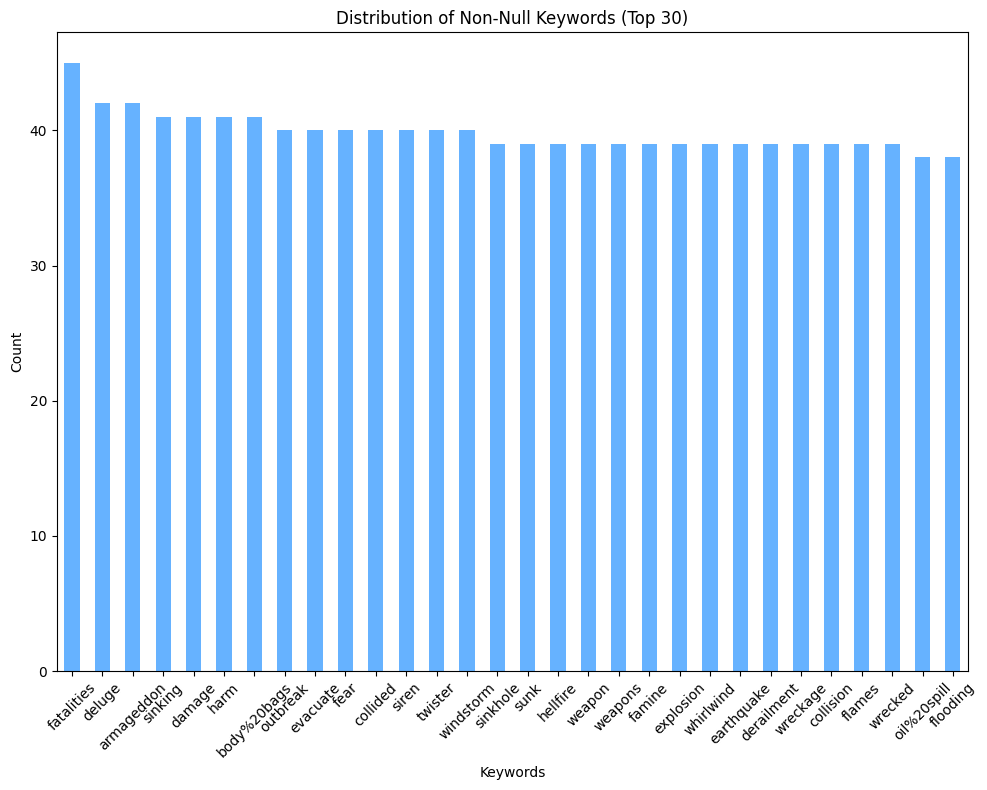

In [109]:
# Get the distribution of non-null keywords
keyword_distribution = train['keyword'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
keyword_distribution.plot(kind='bar', ax=ax, color='#66b2ff')
plt.title('Distribution of Non-Null Keywords (Top 30)')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

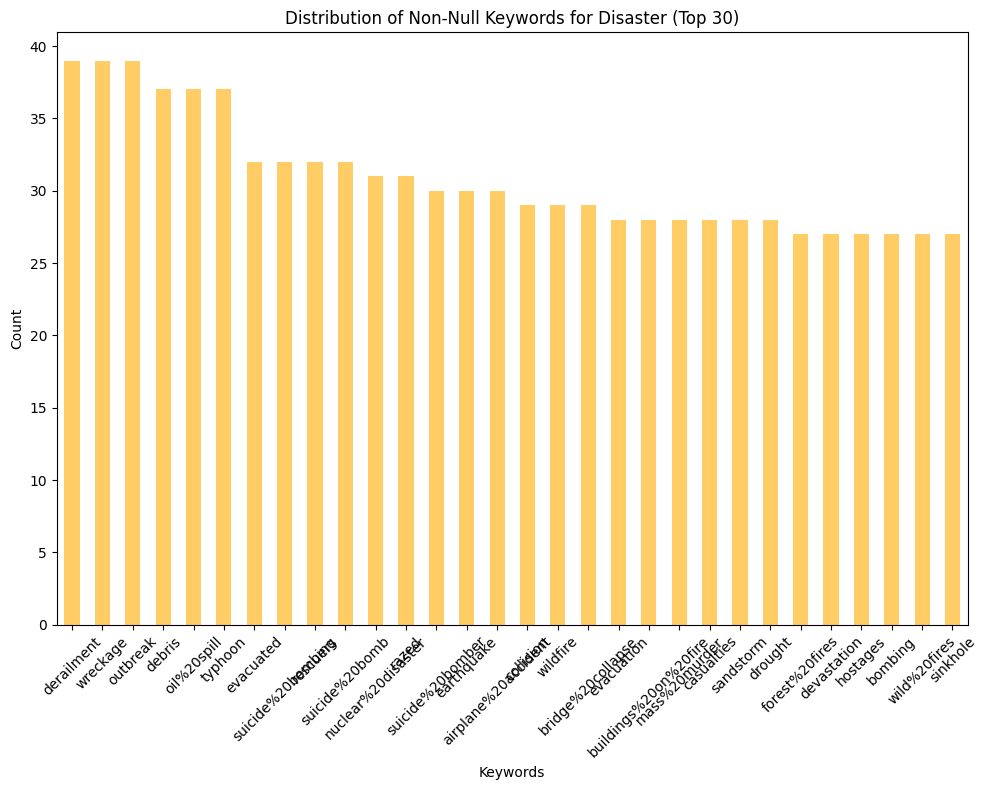

In [112]:
# Filter the data where target = 1
disaster_data = train[train['target'] == 1]

# Get the distribution of non-null keywords for target = 1
keyword_disaster_distribution = disaster_data['keyword'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
keyword_disaster_distribution.plot(kind='bar', ax=ax, color='#ffcc66')
plt.title('Distribution of Non-Null Keywords for Disaster (Top 30)')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

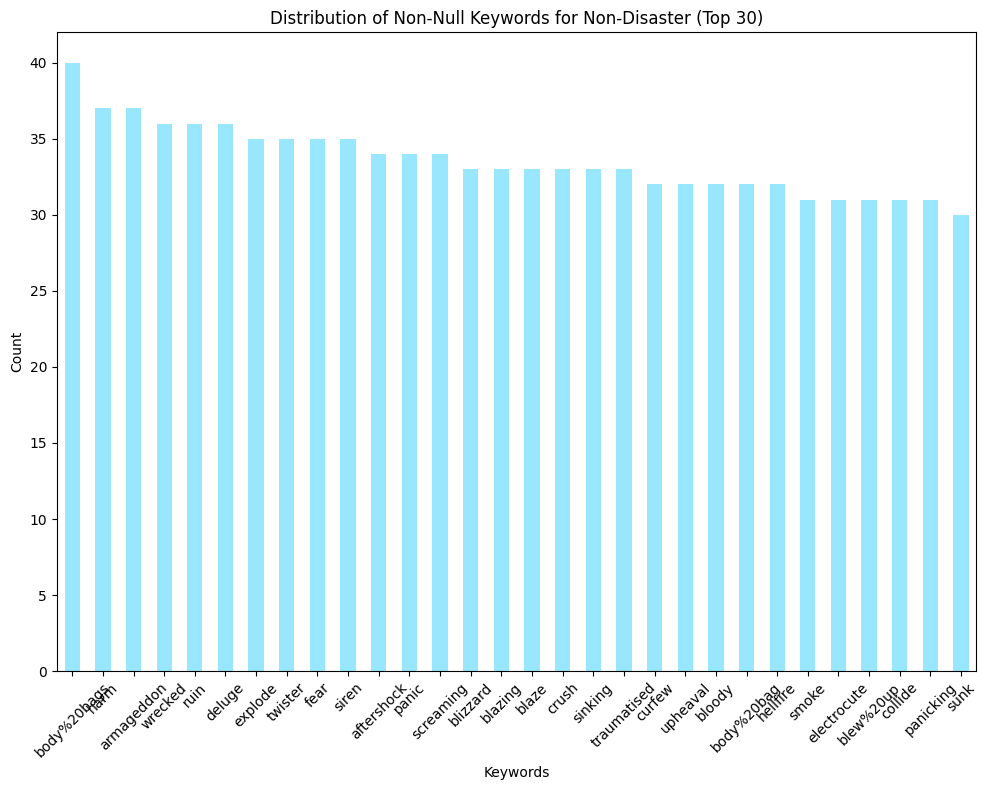

In [113]:
# Filter the data where target = 0 (Non-Disaster)
non_disaster_data = train[train['target'] == 0]

# Get the distribution of non-null keywords for target = 0
keyword_non_disaster_distribution = non_disaster_data['keyword'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
keyword_non_disaster_distribution.plot(kind='bar', ax=ax, color='#99e6ff')
plt.title('Distribution of Non-Null Keywords for Non-Disaster (Top 30)')
plt.ylabel('Count')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

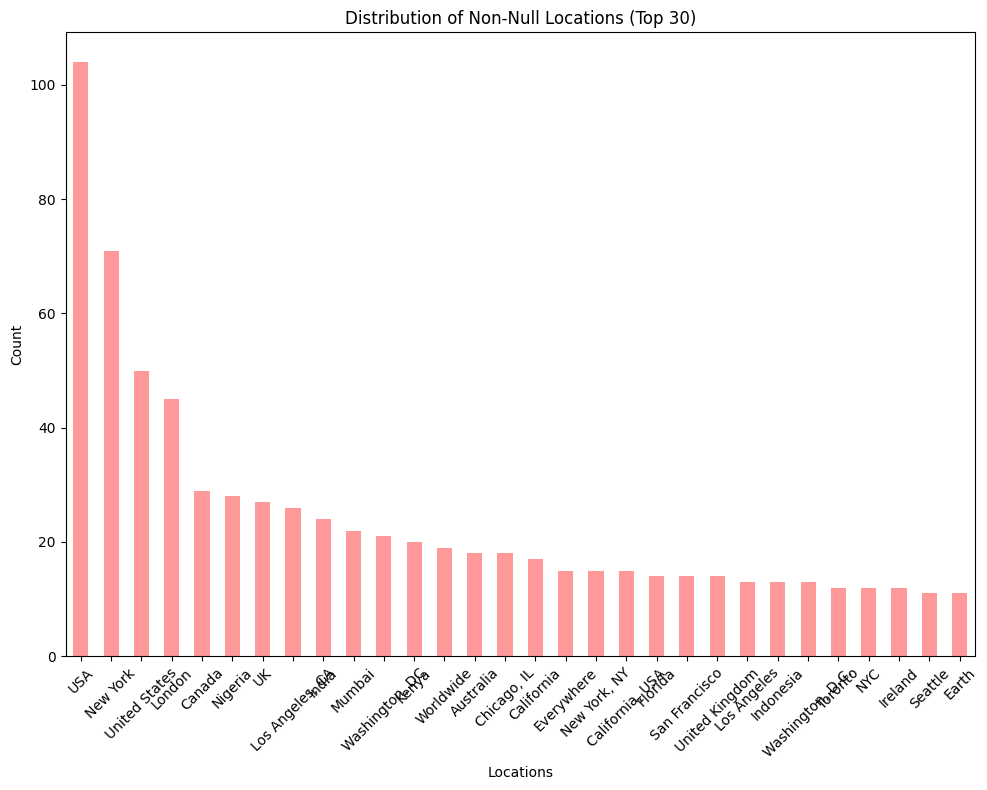

In [111]:
# Get the distribution of non-null keywords
location_distribution = train['location'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
location_distribution.plot(kind='bar', ax=ax, color='#ff9999')
plt.title('Distribution of Non-Null Locations (Top 30)')
plt.ylabel('Count')
plt.xlabel('Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

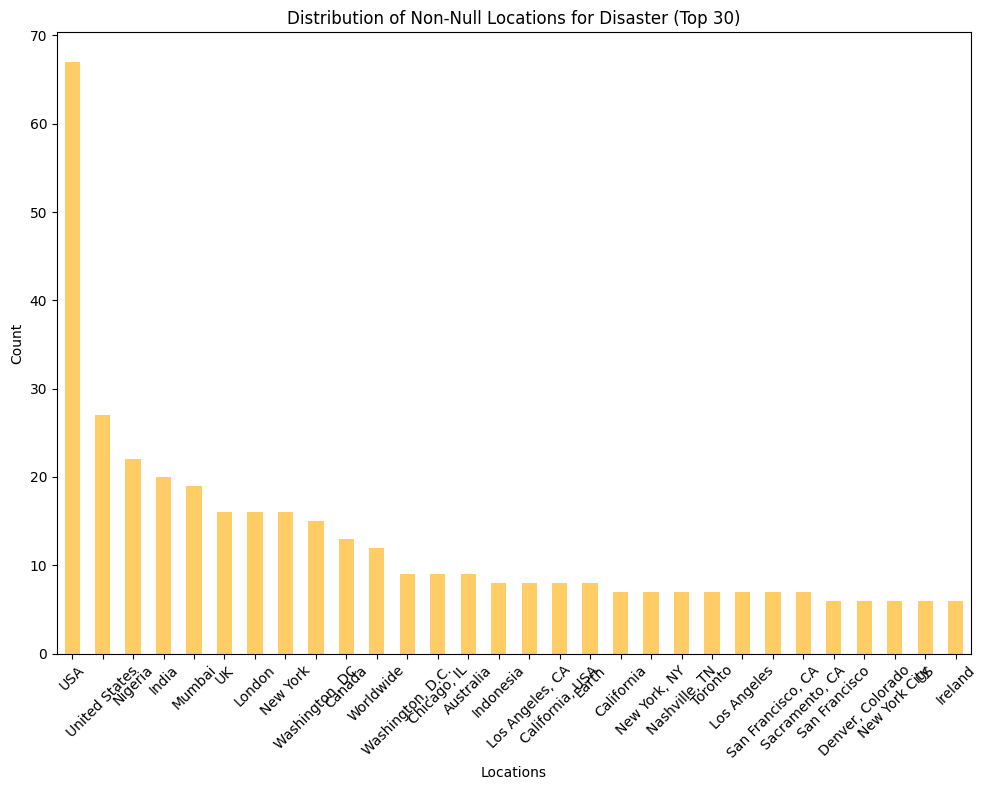

In [114]:
# Get the distribution of non-null locations for target = 1 (Disaster)
location_disaster_distribution = disaster_data['location'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
location_disaster_distribution.plot(kind='bar', ax=ax, color='#ffcc66')
plt.title('Distribution of Non-Null Locations for Disaster (Top 30)')
plt.ylabel('Count')
plt.xlabel('Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

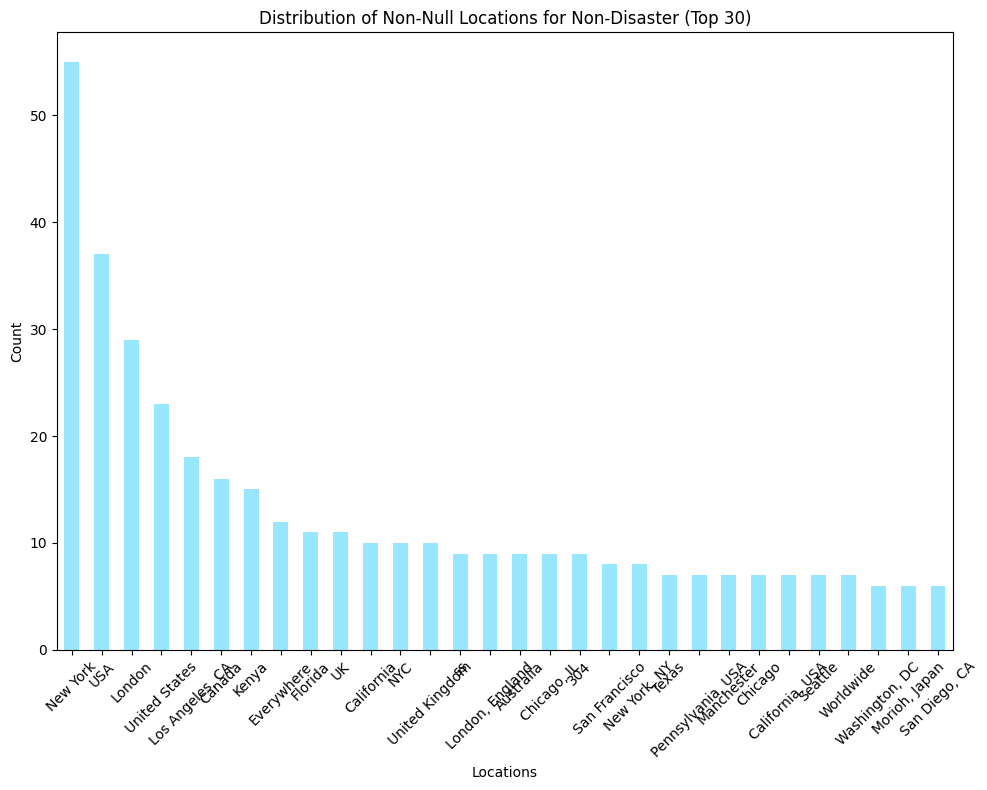

In [115]:
# Get the distribution of non-null locations for target = 0 (Non-Disaster)
location_non_disaster_distribution = non_disaster_data['location'].value_counts().head(30)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
location_non_disaster_distribution.plot(kind='bar', ax=ax, color='#99e6ff')
plt.title('Distribution of Non-Null Locations for Non-Disaster (Top 30)')
plt.ylabel('Count')
plt.xlabel('Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion: There is no clear distribution difference between disaster group and non-disaster group for keywords and location. 


# Preprocessing the data

In [21]:
#preprocessing and tokenize with spacy
nlp = spacy.load('en_core_web_sm')

def custom_lowercase(text):
    doc = nlp(text)
    processed_tokens = []
    
    for token in doc:
        # Lowercase the first word of a sentence
        if token.is_sent_start:
            processed_tokens.append(token.text.lower())
        # Preserve words that are fully uppercase
        elif token.text.isupper():
            processed_tokens.append(token.text)
        # Preserve named entities
        elif token.ent_type_:
            processed_tokens.append(token.text)
        # Default case: lowercase
        else:
            processed_tokens.append(token.text.lower())
    
    return processed_tokens

In [116]:
#remove the http and lower the case
train['text'] = train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
train['text'] = train['text'].apply(custom_lowercase)
test['text'] = test['text'].apply(lambda x: re.sub(r'http\S+', '', x))
test['text'] = test['text'].apply(custom_lowercase)

In [117]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, #, ea...",1
1,4,NaN,NaN,"[forest, fire, near, La, Ronge, Sask, ., canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, ', shelter, in, pl...",1
3,6,NaN,NaN,"[13,000, people, receive, #, wildfires, evacua...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, Ruby, #, ...",1
5,8,NaN,NaN,"[#, rockyfire, update, =, >, California, Hwy, ...",1
6,10,NaN,NaN,"[#, flood, #, disaster, heavy, rain, causes, f...",1
7,13,NaN,NaN,"[i, 'm, on, top, of, the, hill, and, I, can, s...",1
8,14,NaN,NaN,"[there, 's, an, emergency, evacuation, happeni...",1
9,15,NaN,NaN,"[i, 'm, afraid, that, the, tornado, is, coming...",1


In [118]:
def is_number(token):
    # This regex will match numbers which might contain a comma or a period
    return bool(re.match(r'^\d+([.,]\d+)*$', token))

In [119]:
def remove_stopwords_punct_and_numbers(tokens):
    return [
        token for token in tokens 
        if not nlp.vocab[token].is_stop 
        and not nlp.vocab[token].is_punct 
        and not is_number(token)  # Updated number check
        and token not in ["=", ">", "<"]  # Add any other specific symbols or words you want to remove
    ]

train['text'] = train['text'].apply(remove_stopwords_punct_and_numbers)
test['text'] = test['text'].apply(remove_stopwords_punct_and_numbers)


In [120]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, ALLAH, Forgive]",1
1,4,NaN,NaN,"[forest, fire, near, La, Ronge, Sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...",1
5,8,NaN,NaN,"[rockyfire, update, California, Hwy, closed, d...",1
6,10,NaN,NaN,"[flood, disaster, heavy, rain, causes, flash, ...",1
7,13,NaN,NaN,"[hill, fire, woods]",1
8,14,NaN,NaN,"[emergency, evacuation, happening, building, s...",1
9,15,NaN,NaN,"[afraid, tornado, coming, area]",1


In [121]:
def clean_tokens(tokens):
    cleaned_tokens = [re.sub(r'\x89[\x8A-\xFF]', '', token) for token in tokens]
    
    cleaned_tokens = [token for token in cleaned_tokens 
                      if not token.startswith('@') 
                      and len(token) > 1
                      and not re.match(r'^\d{1,2}/\d{1,2}$', token)  # Remove dates like 8/6
                      and not re.match(r'\d{1,2}:\d{2}', token)  # Remove times like 1:18
                      and not token.upper() in ['AM', 'PM']  # Remove standalone AM and PM
                      and token.strip() 
                      and token != '\n']
    
    return cleaned_tokens

train['text'] = train['text'].apply(clean_tokens)
test['text'] = test['text'].apply(clean_tokens)

In [122]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, ALLAH, Forgive]",1
1,4,NaN,NaN,"[forest, fire, near, La, Ronge, Sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...",1
5,8,NaN,NaN,"[rockyfire, update, California, Hwy, closed, d...",1
6,10,NaN,NaN,"[flood, disaster, heavy, rain, causes, flash, ...",1
7,13,NaN,NaN,"[hill, fire, woods]",1
8,14,NaN,NaN,"[emergency, evacuation, happening, building, s...",1
9,15,NaN,NaN,"[afraid, tornado, coming, area]",1


In [123]:
def lemmatize_direct(tokens):
    lemmatized_tokens = []
    for token in tokens:
        # Convert the token to a SpaCy token
        spacy_token = nlp(token)
        # Append the lemma to the list
        lemmatized_tokens.append(spacy_token[0].lemma_)
    return lemmatized_tokens

train['text'] = train['text'].apply(lemmatize_direct)
test['text'] = test['text'].apply(lemmatize_direct)

In [124]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquake, ALLAH, Forgive]",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[resident, ask, shelter, place, notify, office...",1
3,6,NaN,NaN,"[people, receive, wildfire, evacuation, order,...",1
4,7,NaN,NaN,"[get, send, photo, Ruby, Alaska, smoke, wildfi...",1
5,8,NaN,NaN,"[rockyfire, update, California, hwy, close, di...",1
6,10,NaN,NaN,"[flood, disaster, heavy, rain, cause, flash, f...",1
7,13,NaN,NaN,"[hill, fire, wood]",1
8,14,NaN,NaN,"[emergency, evacuation, happen, build, street]",1
9,15,NaN,NaN,"[afraid, tornado, come, area]",1


# Modeling

## Result of Base model

In [127]:
from gensim.models import Word2Vec

In [128]:
data = train['text'].tolist()


In [129]:
data

[['deed', 'reason', 'earthquake', 'ALLAH', 'Forgive'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['resident',
  'ask',
  'shelter',
  'place',
  'notify',
  'officer',
  'evacuation',
  'shelter',
  'place',
  'order',
  'expect'],
 ['people', 'receive', 'wildfire', 'evacuation', 'order', 'California'],
 ['get',
  'send',
  'photo',
  'Ruby',
  'Alaska',
  'smoke',
  'wildfire',
  'pour',
  'school'],
 ['rockyfire',
  'update',
  'California',
  'hwy',
  'close',
  'direction',
  'lake',
  'county',
  'fire',
  'cafire',
  'wildfire'],
 ['flood',
  'disaster',
  'heavy',
  'rain',
  'cause',
  'flash',
  'flood',
  'street',
  'Manitou',
  'Colorado',
  'spring',
  'area'],
 ['hill', 'fire', 'wood'],
 ['emergency', 'evacuation', 'happen', 'build', 'street'],
 ['afraid', 'tornado', 'come', 'area'],
 ['people', 'die', 'heat', 'wave', 'far'],
 ['haha',
  'south',
  'tampa',
  'get',
  'flood',
  'hah-',
  'wait',
  'second',
  'LIVE',
  'south',
  'tampa',
  'GONNA',


In [130]:
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)


In [131]:

# Convert sentences to averaged word vectors
def sentence_to_avg_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv.index_to_key]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return np.zeros(model.vector_size)

data_vectors = [sentence_to_avg_vector(sentence, model) for sentence in data]
labels = train['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_vectors, labels, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5738673670387393
              precision    recall  f1-score   support

           0       0.58      0.92      0.71       874
           1       0.50      0.10      0.17       649

    accuracy                           0.57      1523
   macro avg       0.54      0.51      0.44      1523
weighted avg       0.55      0.57      0.48      1523



## result with RNN and crossvalidation

In [68]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 KB 2.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 1.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold

# Constants
VOCAB_SIZE = len(model.wv.key_to_index) + 1  # Adding 1 because of reserved 0 index for padding
EMBEDDING_DIM = 100  # As defined while training Word2Vec
MAX_LENGTH = max(len(x) for x in data)

# Convert sentences to indices
def sentence_to_indices(sentence):
    return [model.wv.key_to_index[key] for key in sentence if key in model.wv]

X = [sentence_to_indices(sentence) for sentence in data]
X = pad_sequences(X, padding='post', maxlen=MAX_LENGTH)
y = np.array(train['target'])

# RNN Model
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in model.wv.key_to_index.items():
    embedding_matrix[i] = model.wv[word]

model_rnn = Sequential()
model_rnn.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=False))
model_rnn.add(SimpleRNN(50, return_sequences=True))
model_rnn.add(SimpleRNN(50))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Cross-Validation
num_epochs = 10
batch_size = 32
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    history = model_rnn.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    
    # Save metrics
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])


Epoch 1/10
191/191 [==============================] - 3s 12ms/step - loss: 0.6771 - accuracy: 0.5688 - val_loss: 0.6684 - val_accuracy: 0.5666
Epoch 2/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6663 - accuracy: 0.5903 - val_loss: 0.6774 - val_accuracy: 0.5476
Epoch 3/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6627 - accuracy: 0.5933 - val_loss: 0.6726 - val_accuracy: 0.5778
Epoch 4/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6601 - accuracy: 0.5934 - val_loss: 0.6681 - val_accuracy: 0.5811
Epoch 5/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6579 - accuracy: 0.5980 - val_loss: 0.6644 - val_accuracy: 0.6047
Epoch 6/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6569 - accuracy: 0.5984 - val_loss: 0.6705 - val_accuracy: 0.5699
Epoch 7/10
191/191 [==============================] - 2s 10ms/step - loss: 0.6534 - accuracy: 0.6057 - val_loss: 0.6689 - val_accuracy: 0.5863

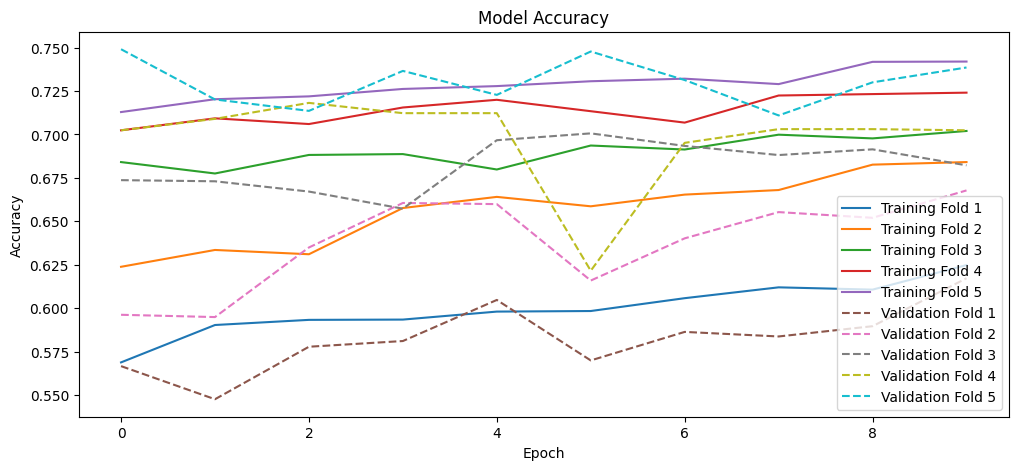

In [88]:
# Plotting accuracy
plt.figure(figsize=(12, 5))

for i, acc in enumerate(train_accuracies):
    plt.plot(acc, label=f'Training Fold {i+1}')
for i, val_acc in enumerate(val_accuracies):
    plt.plot(val_acc, '--', label=f'Validation Fold {i+1}')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


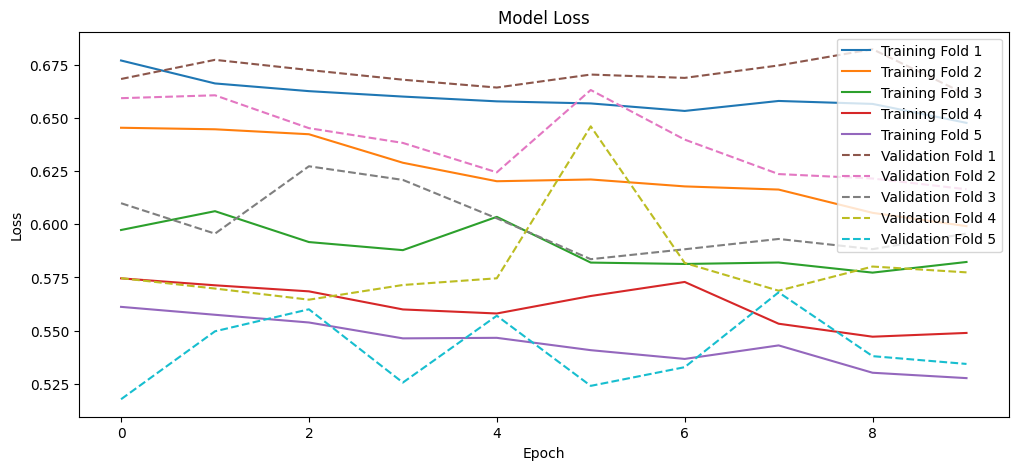

In [90]:
# Plotting accuracy
plt.figure(figsize=(12, 5))

for i, loss in enumerate(train_losses):
    plt.plot(loss, label=f'Training Fold {i+1}')
for i, val_loss in enumerate(val_losses):
    plt.plot(val_loss, '--', label=f'Validation Fold {i+1}')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = "best_model.h5"


In [92]:
checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model_rnn.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, 
                  validation_data=(X_val, y_val), callbacks=[checkpoint])


Epoch 1/10
191/191 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7350
Epoch 1: val_accuracy improved from -inf to 0.74261, saving model to best_model.h5
191/191 [==============================] - 2s 10ms/step - loss: 0.5360 - accuracy: 0.7350 - val_loss: 0.5208 - val_accuracy: 0.7426
Epoch 2/10
 13/191 [=>............................] - ETA: 1s - loss: 0.5011 - accuracy: 0.7692

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/191 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7374
Epoch 2: val_accuracy improved from 0.74261 to 0.74984, saving model to best_model.h5
191/191 [==============================] - 2s 10ms/step - loss: 0.5309 - accuracy: 0.7379 - val_loss: 0.5190 - val_accuracy: 0.7498
Epoch 3/10
188/191 [============================>.] - ETA: 0s - loss: 0.5206 - accuracy: 0.7442
Epoch 3: val_accuracy improved from 0.74984 to 0.75378, saving model to best_model.h5
191/191 [==============================] - 2s 10ms/step - loss: 0.5221 - accuracy: 0.7429 - val_loss: 0.5023 - val_accuracy: 0.7538
Epoch 4/10
186/191 [============================>.] - ETA: 0s - loss: 0.5078 - accuracy: 0.7525
Epoch 4: val_accuracy improved from 0.75378 to 0.76297, saving model to best_model.h5
191/191 [==============================] - 2s 10ms/step - loss: 0.5079 - accuracy: 0.7525 - val_loss: 0.5037 - val_accuracy: 0.7630
Epoch 5/10
187/191 [============================>.] - ETA: 0s - loss:

In [93]:
from sklearn.metrics import classification_report
y_pred = (model_rnn.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_pred))


48/48 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       868
           1       0.79      0.70      0.74       654

    accuracy                           0.79      1522
   macro avg       0.79      0.78      0.78      1522
weighted avg       0.79      0.79      0.79      1522



In [133]:
from tensorflow.keras.models import load_model

loaded_model = load_model(best_model_path)

In [134]:
test_data = test['text'].tolist()

In [135]:
test_data

[['happen', 'terrible', 'car', 'crash'],
 ['hear', 'earthquake', 'different', 'city', 'stay', 'safe'],
 ['forest', 'fire', 'spot', 'pond', 'geese', 'flee', 'street', 'save'],
 ['apocalypse', 'light', 'spokane', 'wildfire'],
 ['typhoon', 'soudelor', 'kill', 'China', 'Taiwan'],
 ['shake', 'earthquake'],
 ['probably', 'life', 'arsenal', 'yesterday', 'eh', 'eh'],
 ['hey'],
 ['nice', 'hat'],
 ['fuck'],
 ['like', 'cold'],
 ['nooooooooo'],
 ['tell'],
 [],
 ['awesome'],
 ['birmingham',
  'wholesale',
  'market',
  'ablaze',
  'BBC',
  'news',
  'fire',
  'break',
  'Birmingham',
  'wholesale',
  'market'],
 ['wear', 'short', 'race', 'ablaze'],
 ['previouslyondoyintv',
  'toke',
  'Makinwaªs',
  'marriage',
  'crisis',
  'set',
  'Nigerian',
  'twitter',
  'ablaze'],
 ['check', 'nsfw'],
 ['psa',
  'iªm',
  'split',
  'personality',
  'techie',
  'follow',
  'burner',
  'follow'],
 ['beware', 'world', 'ablaze', 'sierra', 'leone', 'amp', 'guap'],
 ['burn', 'man', 'ablaze', 'turban', 'diva'],
 ['d

In [137]:
# Convert test sentences to integer sequences
X_test = [sentence_to_indices(sentence) for sentence in test_data]
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_LENGTH)

# Predict using the loaded model
predictions = loaded_model.predict(X_test)


102/102 [==============================] - 1s 4ms/step


In [138]:
predicted_labels = (predictions > 0.5).astype(int)


In [139]:
predicted_labels

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])